In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Pea Flowers

In [4]:
null = make_array('Purple', 'Purple', 'Purple', 'White')

def test_stat(sample):
    proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
    return abs(proportion_purple - 0.75)

total_plants = 929
observed_statistic = 0.0088805166846070982

In [6]:
# Simulating the test statistic under the null hypothesis
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(null, total_plants)
    sampled_stats = np.append(sampled_stats, test_stat(new_sample))

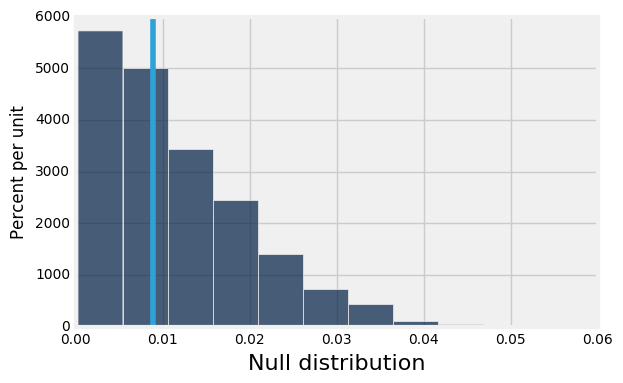

In [15]:
null_dist = Table().with_column('Null distribution', sampled_stats)
null_dist.hist()
_ = plots.plot([observed_statistic, observed_statistic], [0, 60])

## P-value

In [14]:
# The P-value (an approximation based on the simulation)
np.count_nonzero(sampled_stats >= observed_statistic)/repetitions

0.5468

## Error Probability

In [22]:
cutoff = null_dist.sort(0, descending=True).row(round(0.05 * 5000)).item(0)
cutoff

0.028256189451022595

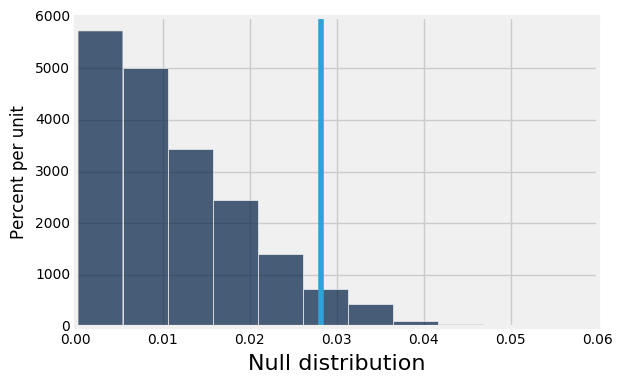

In [23]:
null_dist.hist()
_ = plots.plot([cutoff, cutoff], [0, 60])

## Test Statistics

In [26]:
def number_of_different_colors(sample):
    return Table().with_column('values', sample).group(0).num_rows

observed = 2

In [27]:
# Simulating the test statistic under the null hypothesis
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = np.random.choice(null, total_plants)
    sampled_stats = np.append(sampled_stats, number_of_different_colors(new_sample))

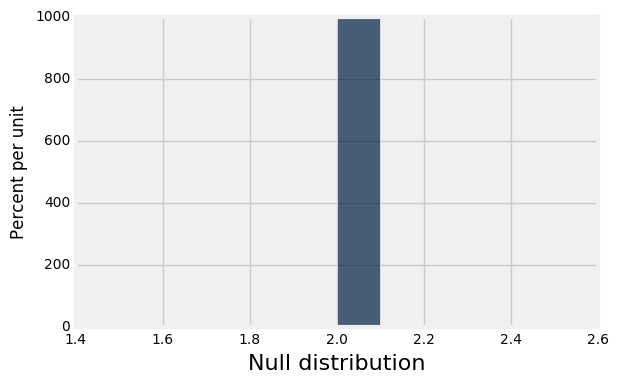

In [29]:
Table().with_column('Null distribution', sampled_stats).hist()